In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
from sklearn import preprocessing

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('PopulaçãoReal.csv').iloc[:72,:]
df

,ANO,PARAÍBA,NORDESTE,NORTE,SUDESTE,SUL,CENTRO-OESTE,BRASIL IBGE,BRASIL,MUNDO,FR BRASIL,FR MUNDO,DR BRASIL,DR MUNDO,BR BRASIL,BR MUNDO,LE BRASIL,LE MUNDO
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53 152,2 477 675,"6,12","4,86","17,3","19,5","46,4","36,8","48,1","46,5"
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54 759,2 520 970,"6,12","4,83","17,1","19,1","46,4","36,5","48,4","47,1"
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56 423,2 565 291,"6,10","5,01","16,8","18,4","46,2","37,7","48,9","48,2"
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58 143,2 615 251,"6,09","4,94","16,5","18,0","46,0","36,9","49,2","48,8"
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59 908,2 665 307,"6,09","5,01","16,1","17,5","45,8","37,3","49,7","49,6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2017,4.025.558,57.254.159,17.936.201,86.949.714,29.644.948,15.875.907,207.660.929,207 678,7 556 993,"1,74","2,50","6,5","7,5","14,2","18,8","74,8","72,3"
68,2018,3.996.496,56.760.780,18.182.253,87.711.946,29.754.036,16.085.885,208.494.900,209 332,7 642 651,"1,75","2,44","6,5","7,5","14,1","18,2","75,1","72,6"
69,2019,4.018.127,57.071.654,18.430.980,88.371.433,29.975.984,16.297.074,210.147.125,211 001,7 724 928,"1,70","2,41","6,6","7,5","13,6","17,8","75,3","72,8"
70,2020,4.039.277,57.374.243,18.672.591,89.012.240,30.192.315,16.504.303,211.755.692,212 565,7 804 974,"1,65","2,35","7,4","8,1","13,1","17,2","74,0","72,0"


In [3]:
def divide(x):
    try:
        return int(x/1000)
    except:
        return x

for col in ['PARAÍBA', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL', 'CENTRO-OESTE','BRASIL IBGE']:
    df[col] = df[col].str.replace('.', '', regex = True).astype(float)
    df[col] = df[col].apply(lambda x: divide(x))
for col in ['BRASIL', 'MUNDO','ANO']:
    df[col] = df[col].apply(lambda x: int(x.replace(" ", "")))
for col in ['FR BRASIL', 'FR MUNDO', 'DR BRASIL', 'DR MUNDO', 'BR BRASIL', 'BR MUNDO', 'LE BRASIL', 'LE MUNDO']:
    df[col] = df[col].apply(lambda x: float(x.replace(",", ".")))
df = df.set_index('ANO')
df

,PARAÍBA,NORDESTE,NORTE,SUDESTE,SUL,CENTRO-OESTE,BRASIL IBGE,BRASIL,MUNDO,FR BRASIL,FR MUNDO,DR BRASIL,DR MUNDO,BR BRASIL,BR MUNDO,LE BRASIL,LE MUNDO
ANO,,,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53152,2477675,6.12,4.86,17.3,19.5,46.4,36.8,48.1,46.5
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54759,2520970,6.12,4.83,17.1,19.1,46.4,36.5,48.4,47.1
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56423,2565291,6.10,5.01,16.8,18.4,46.2,37.7,48.9,48.2
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58143,2615251,6.09,4.94,16.5,18.0,46.0,36.9,49.2,48.8
1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59908,2665307,6.09,5.01,16.1,17.5,45.8,37.3,49.7,49.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,4025.0,57254.0,17936.0,86949.0,29644.0,15875.0,207660.0,207678,7556993,1.74,2.50,6.5,7.5,14.2,18.8,74.8,72.3
2018,3996.0,56760.0,18182.0,87711.0,29754.0,16085.0,208494.0,209332,7642651,1.75,2.44,6.5,7.5,14.1,18.2,75.1,72.6
2019,4018.0,57071.0,18430.0,88371.0,29975.0,16297.0,210147.0,211001,7724928,1.70,2.41,6.6,7.5,13.6,17.8,75.3,72.8


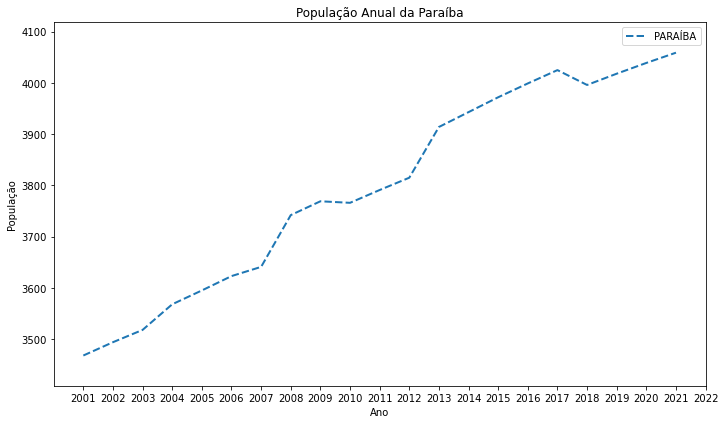

In [4]:
plt.figure(figsize=(10, 6))

columns = ["PARAÍBA"]
max_v = df[columns].max().max()
min_v = df[columns].min().min()
for col in columns:
    plt.plot(df.index, df[col], label=col, linestyle='dashed', 
             linewidth=2)

plt.title('População Anual da Paraíba')
plt.xlabel('Ano')
plt.ylabel('População')

plt.legend()

plt.tight_layout()

plt.ylim(min_v-((max_v-min_v)*.1), max_v+((max_v-min_v)*.1))
plt.xticks([i for i in range(2001, 2023)],[str(i)[:] for i in range(2001, 2023)]) #valores reais e label

plt.show() 

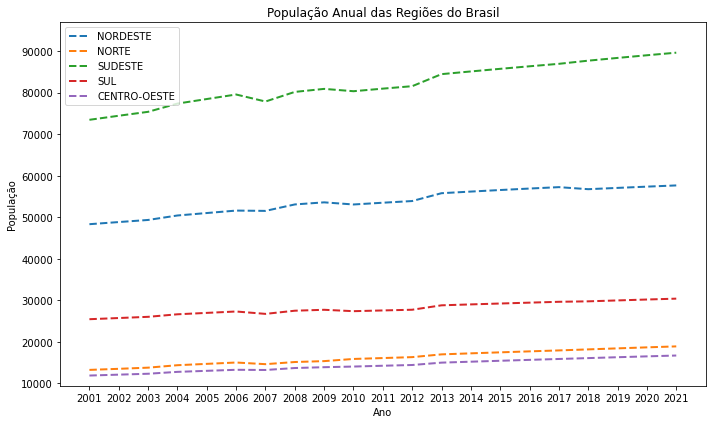

In [5]:
plt.figure(figsize=(10, 6))

columns = ["NORDESTE","NORTE","SUDESTE","SUL","CENTRO-OESTE"]
max_v = df[columns].max().max()
min_v = df[columns].max().min()
for col in columns:
    plt.plot(df.index, df[col], label=col, linestyle='dashed', 
             linewidth=2)

# Add title and labels

plt.title('População Anual das Regiões do Brasil')
plt.xlabel('Ano')
plt.ylabel('População')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Change x e y values

plt.ylim(min_v-((max_v-min_v)*.1), max_v+((max_v-min_v)*.1))
plt.xticks([i for i in range(2001, 2022)],[str(i)[:] for i in range(2001, 2022)]) #valores reais e label

# Display plot

plt.show() 

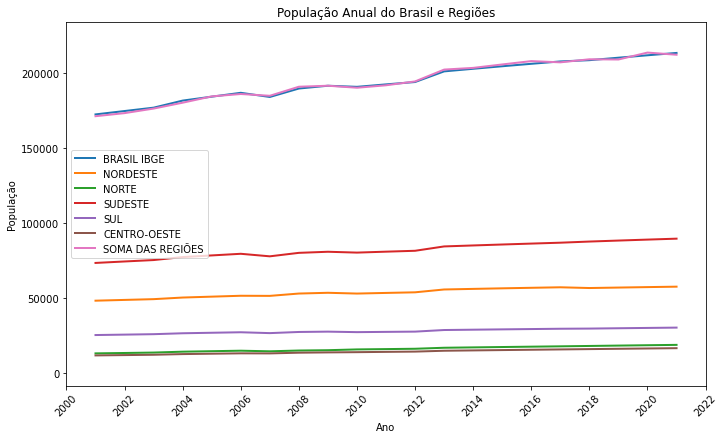

In [6]:
import random

plt.figure(figsize=(10, 6))
df["SOMA DAS REGIÕES"] = df[["NORDESTE","NORTE","SUDESTE","SUL","CENTRO-OESTE"]].sum(axis=1)
df["SOMA DAS REGIÕES"].replace(0, np.nan, inplace=True)
df["SOMA DAS REGIÕES"] = df["SOMA DAS REGIÕES"].apply(lambda x: x + random.randrange(-2000, 2000, 200))
columns = ["BRASIL IBGE","NORDESTE","NORTE","SUDESTE","SUL","CENTRO-OESTE", "SOMA DAS REGIÕES"]

max_v = df[columns].max().max()
min_v = df[columns].min().min()
for col in columns:
    plt.plot(df.index, df[col], label=col, 
             linewidth=2)
    
plt.title('População Anual do Brasil e Regiões')
plt.xlabel('Ano')
plt.ylabel('População')

plt.legend()

plt.tight_layout()

plt.ylim(min_v-((max_v-min_v)*.1), max_v+((max_v-min_v)*.1))
plt.xticks([i for i in range(2000, 2023,2)],[str(i)[:] for i in range(2000, 2023,2)]) #valores reais e label
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show() 

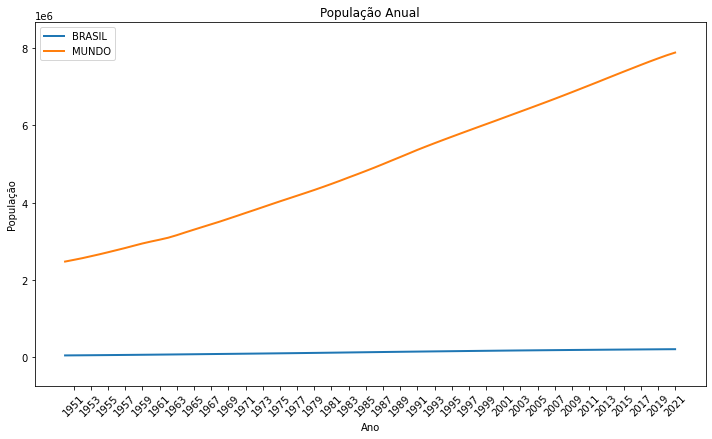

In [7]:
plt.figure(figsize=(10, 6))

columns = ["BRASIL", "MUNDO"]

max_v = df[columns].max().max()
min_v = df[columns].min().min()
for col in columns:
    plt.plot(df.index, df[col], label=col, 
             linewidth=2)

plt.title('População Anual')
plt.xlabel('Ano')
plt.ylabel('População')

plt.legend()

plt.tight_layout()

plt.ylim(min_v-((max_v-min_v)*.1), max_v+((max_v-min_v)*.1))
plt.xticks([i for i in range(1951, 2023,2)],[str(i)[:] for i in range(1951, 2023,2)]) #valores reais e label
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show() 

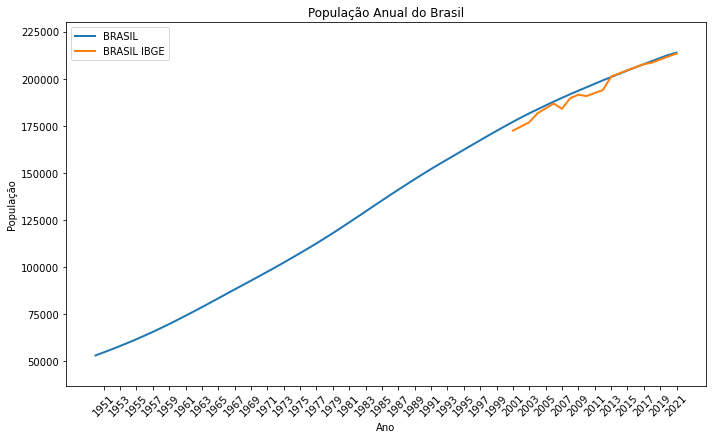

In [8]:
plt.figure(figsize=(10, 6))

columns = ["BRASIL","BRASIL IBGE"]

max_v = df[columns].max().max()
min_v = df[columns].min().min()
for col in columns:
    plt.plot(df.index, df[col], label=col, 
             linewidth=2)

plt.title('População Anual do Brasil')
plt.xlabel('Ano')
plt.ylabel('População')

plt.legend()

plt.tight_layout()

plt.ylim(min_v-((max_v-min_v)*.1), max_v+((max_v-min_v)*.1))
plt.xticks([i for i in range(1951, 2023,2)],[str(i)[:] for i in range(1951, 2023,2)]) #valores reais e label
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show() 

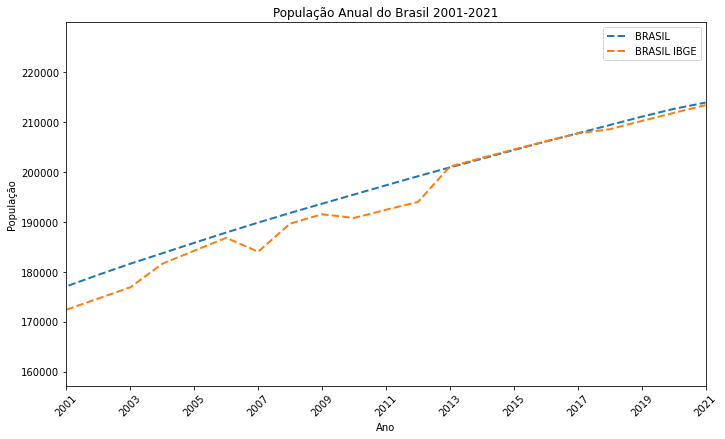

In [9]:
plt.figure(figsize=(10, 6))

columns = ["BRASIL","BRASIL IBGE"]

max_v = df[columns].max().max()
min_v = df[columns].min().min()
for col in columns:
    plt.plot(df.index, df[col], label=col, linestyle='dashed',
             linewidth=2)

plt.title('População Anual do Brasil 2001-2021')
plt.xlabel('Ano')
plt.ylabel('População')

plt.legend()

plt.tight_layout()

plt.ylim(df._get_value(1993, "BRASIL") , max_v+((max_v-min_v)*.1))
plt.xlim(2001,2021)
plt.xticks([i for i in range(2001, 2023,2)],[str(i)[:] for i in range(2001, 2023,2)]) #valores reais e label
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show() 

# OUTROS DADOS

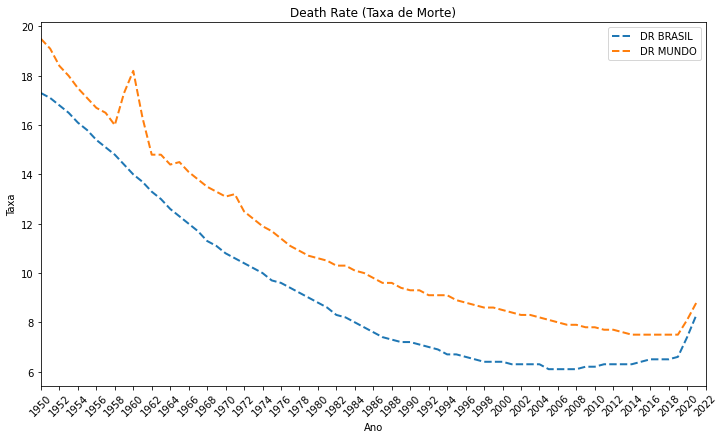

In [10]:
plt.figure(figsize=(10, 6))

columns = ["DR BRASIL","DR MUNDO"]

max_v = df[columns].max().max()
min_v = df[columns].min().min()
for col in columns:
    plt.plot(df.index, df[col], label=col, linestyle='dashed',
             linewidth=2)

plt.title('Death Rate (Taxa de Morte)')
plt.xlabel('Ano')
plt.ylabel('Taxa')

plt.legend()

plt.tight_layout()

plt.xlim(1950,2021)
plt.xticks([i for i in range(1950, 2023,2)],[str(i)[:] for i in range(1950, 2023,2)]) #valores reais e label
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show() 

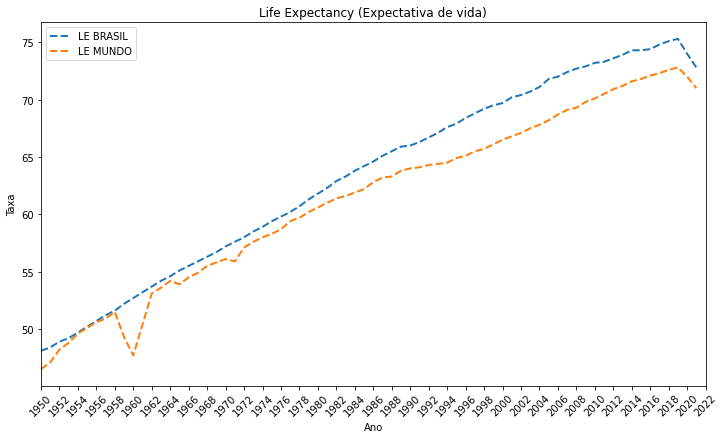

In [11]:
plt.figure(figsize=(10, 6))

columns = ["LE BRASIL","LE MUNDO"]

max_v = df[columns].max().max()
min_v = df[columns].min().min()
for col in columns:
    plt.plot(df.index, df[col], label=col, linestyle='dashed',
             linewidth=2)

plt.title('Life Expectancy (Expectativa de vida)')
plt.xlabel('Ano')
plt.ylabel('Taxa')

plt.legend()

plt.tight_layout()

plt.xlim(1950,2021)
plt.xticks([i for i in range(1950, 2023,2)],[str(i)[:] for i in range(1950, 2023,2)]) #valores reais e label
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show() 

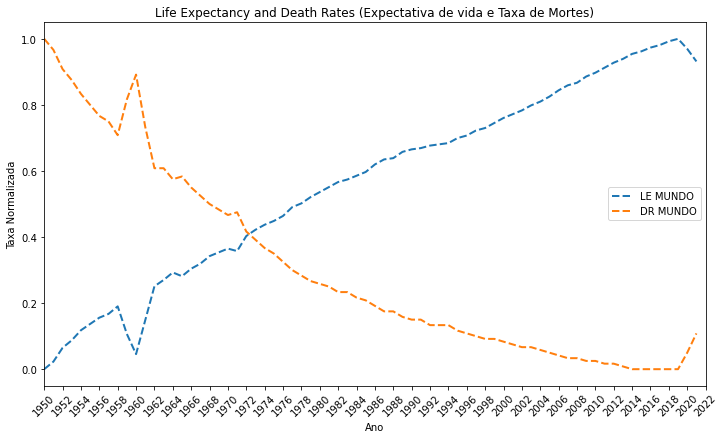

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()

plt.figure(figsize=(10, 6))

columns = ["LE MUNDO","DR MUNDO"]

max_v = df[columns].max().max()
min_v = df[columns].min().min()
for col in columns:
    plt.plot(df.index, min_max_scaler.fit_transform(pd.DataFrame(df[col].values)), label=col, linestyle='dashed',
             linewidth=2)

plt.title('Life Expectancy and Death Rates (Expectativa de vida e Taxa de Mortes)')
plt.xlabel('Ano')
plt.ylabel('Taxa Normalizada')

plt.legend()

plt.tight_layout()

plt.xlim(1950,2021)
plt.xticks([i for i in range(1950, 2023,2)],[str(i)[:] for i in range(1950, 2023,2)]) #valores reais e label
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show() 

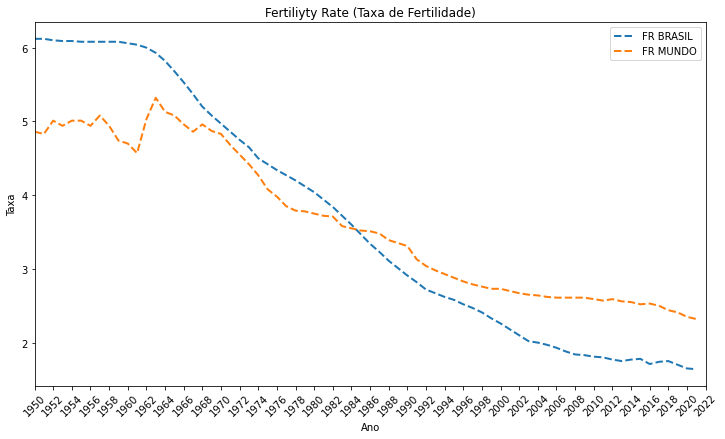

In [13]:
plt.figure(figsize=(10, 6))

columns = ["FR BRASIL","FR MUNDO"]

max_v = df[columns].max().max()
min_v = df[columns].min().min()
for col in columns:
    plt.plot(df.index, df[col], label=col, linestyle='dashed',
             linewidth=2)

plt.title('Fertiliyty Rate (Taxa de Fertilidade)')
plt.xlabel('Ano')
plt.ylabel('Taxa')

plt.legend()

plt.tight_layout()

plt.xlim(1950,2021)
plt.xticks([i for i in range(1950, 2023,2)],[str(i)[:] for i in range(1950, 2023,2)]) #valores reais e label
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show() 

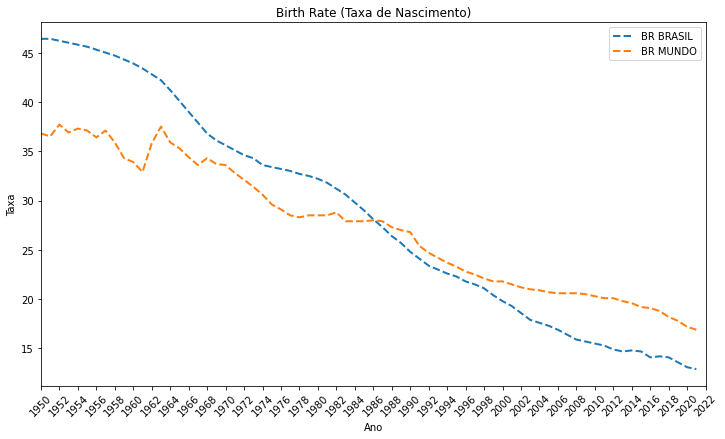

In [14]:
plt.figure(figsize=(10, 6))

columns = ["BR BRASIL","BR MUNDO"]

max_v = df[columns].max().max()
min_v = df[columns].min().min()
for col in columns:
    plt.plot(df.index, df[col], label=col, linestyle='dashed',
             linewidth=2)

plt.title('Birth Rate (Taxa de Nascimento)')
plt.xlabel('Ano')
plt.ylabel('Taxa')

plt.legend()

plt.tight_layout()

plt.xlim(1950,2021)
plt.xticks([i for i in range(1950, 2023,2)],[str(i)[:] for i in range(1950, 2023,2)]) #valores reais e label
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show() 

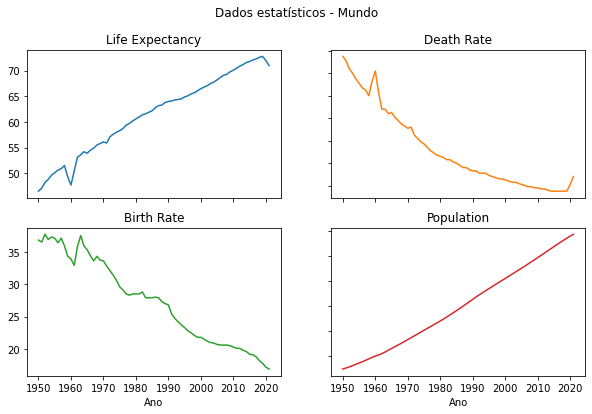

In [56]:
fig, axs = plt.subplots(2,2, figsize=(10, 6))

fig.suptitle('Dados estatísticos - Mundo')

columns = ["LE MUNDO","DR MUNDO", "BR MUNDO", "MUNDO"]

x = [i for i in range(1950, 2022,1)]

axs[0, 0].plot(x, df[columns[0]])
axs[0, 0].set_title('Life Expectancy')
axs[0, 1].plot(x, df[columns[1]], 'tab:orange')
axs[0, 1].set_title('Death Rate')
axs[1, 0].plot(x, df[columns[2]], 'tab:green')
axs[1, 0].set_title('Birth Rate')
axs[1, 1].plot(x, df[columns[3]], 'tab:red')
axs[1, 1].set_title('Population')

for ax in axs.flat:
    ax.set(xlabel='Ano', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# PROJEÇÕES

In [16]:
df_predictions = pd.read_csv('PopulaçãoProjeção.csv')
df_predictions

,ANO,BRASIL,MUNDO,FR BRASIL,FR MUNDO,DR BRASIL,DR MUNDO,BR BRASIL,BR MUNDO,LE BRASIL,LE MUNDO
0,2022,214 825,7 941 658,"1,63","2,31","8,1","8,4","12,6","16,8","73,4","71,7"
1,2023,215 802,8 008 552,"1,62","2,31","6,8","7,6","12,5","16,7","76,2","73,4"
2,2024,217 043,8 082 071,"1,62","2,31","6,9","7,5","12,3","16,6","76,4","73,7"
3,2025,218 232,8 155 601,"1,62","2,30","7,0","7,6","12,1","16,4","76,6","73,8"
4,2026,219 374,8 228 376,"1,62","2,30","7,0","7,6","12,1","16,3","76,8","73,9"
...,...,...,...,...,...,...,...,...,...,...,...
74,2096,189 593,10 392 611,"1,64","1,85","14,1","11,7","8,1","10,9","87,7","81,7"
75,2097,188 458,10 384 423,"1,64","1,85","14,1","11,8","8,1","10,9","87,9","81,8"
76,2098,187 335,10 375 354,"1,64","1,84","14,1","11,8","8,1","10,8","88,0","81,9"
77,2099,186 215,10 365 536,"1,63","1,84","14,1","11,8","8,1","10,8","88,1","82,0"


In [17]:
for col in ['BRASIL', 'MUNDO']:
    df_predictions[col] = df_predictions[col].apply(lambda x: int(x.replace(" ", "")))
for col in ['FR BRASIL', 'FR MUNDO', 'DR BRASIL', 'DR MUNDO', 'BR BRASIL', 'BR MUNDO', 'LE BRASIL', 'LE MUNDO']:
    df_predictions[col] = df_predictions[col].apply(lambda x: float(x.replace(",", ".")))
df_predictions = df_predictions.set_index('ANO')
df_predictions

,BRASIL,MUNDO,FR BRASIL,FR MUNDO,DR BRASIL,DR MUNDO,BR BRASIL,BR MUNDO,LE BRASIL,LE MUNDO
ANO,,,,,,,,,,
2022,214825,7941658,1.63,2.31,8.1,8.4,12.6,16.8,73.4,71.7
2023,215802,8008552,1.62,2.31,6.8,7.6,12.5,16.7,76.2,73.4
2024,217043,8082071,1.62,2.31,6.9,7.5,12.3,16.6,76.4,73.7
2025,218232,8155601,1.62,2.30,7.0,7.6,12.1,16.4,76.6,73.8
2026,219374,8228376,1.62,2.30,7.0,7.6,12.1,16.3,76.8,73.9
...,...,...,...,...,...,...,...,...,...,...
2096,189593,10392611,1.64,1.85,14.1,11.7,8.1,10.9,87.7,81.7
2097,188458,10384423,1.64,1.85,14.1,11.8,8.1,10.9,87.9,81.8
2098,187335,10375354,1.64,1.84,14.1,11.8,8.1,10.8,88.0,81.9


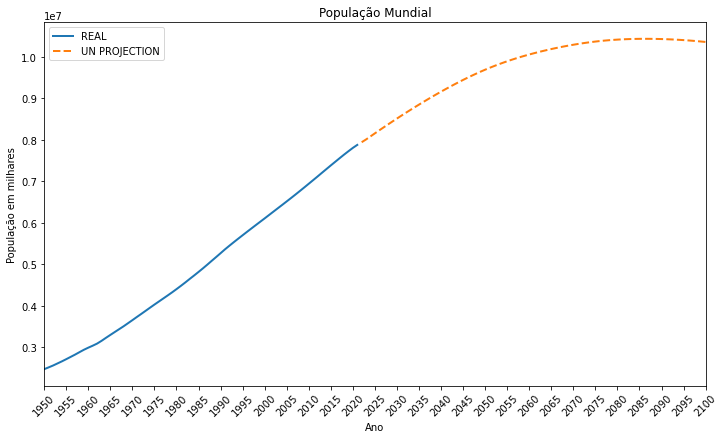

In [18]:
plt.figure(figsize=(10, 6))


plt.plot(np.array([n for n in range(1950, 2022)]), df["MUNDO"], label="REAL", 
        linewidth=2)
plt.plot(np.array([n for n in range(2022, 2101)]), df_predictions["MUNDO"], label="UN PROJECTION",linestyle='dashed',
        linewidth=2)

plt.title('População Mundial')
plt.xlabel('Ano')
plt.ylabel('População em milhares')
plt.legend()

plt.tight_layout()

plt.xlim(1950,2100)
plt.xticks([i for i in range(1950, 2101,5)],[str(i)[:] for i in range(1950, 2101,5)]) #valores reais e label
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show() 

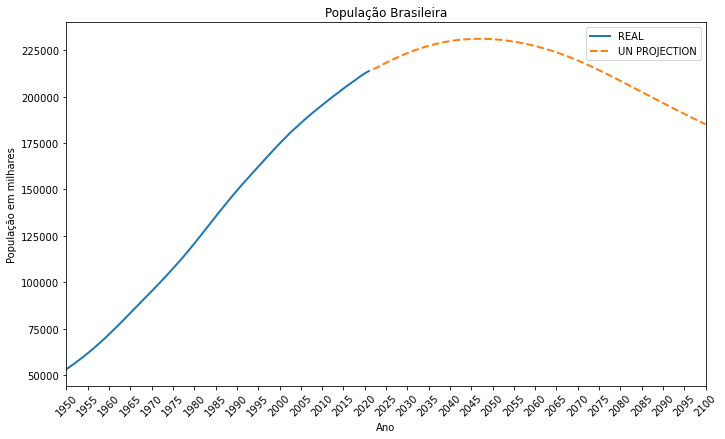

In [19]:
plt.figure(figsize=(10, 6))


plt.plot(np.array([n for n in range(1950, 2022)]), df["BRASIL"], label="REAL",
        linewidth=2)
plt.plot(np.array([n for n in range(2022, 2101)]), df_predictions["BRASIL"], label="UN PROJECTION", linestyle='dashed',
        linewidth=2)

plt.title('População Brasileira')
plt.xlabel('Ano')
plt.ylabel('População em milhares')
plt.legend()

plt.tight_layout()

plt.xlim(1950,2100)
plt.xticks([i for i in range(1950, 2101,5)],[str(i)[:] for i in range(1950, 2101,5)]) #valores reais e label
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show() 